___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

In [7]:
print("There are ", len(x_train), "images in the training dataset")     
print("There are ", len(x_test), "images in the test dataset") 

There are  60000 images in the training dataset
There are  10000 images in the test dataset


**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [8]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

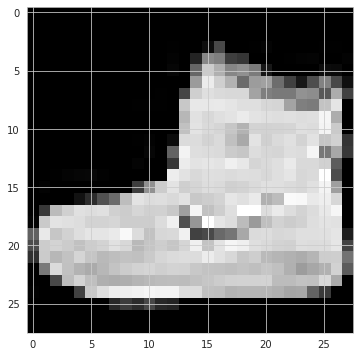

In [9]:
plt.imshow(x_train[0],cmap='gray')

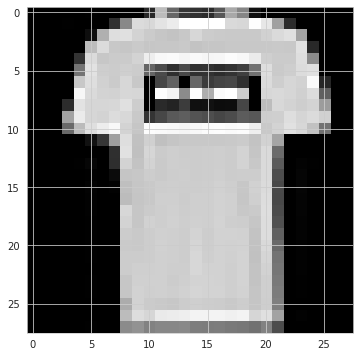

In [10]:
plt.imshow(x_train[1],cmap='gray')

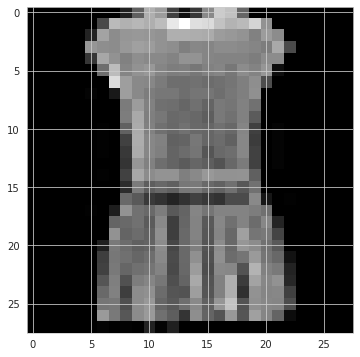

In [11]:
plt.imshow(x_train[3],cmap='gray')

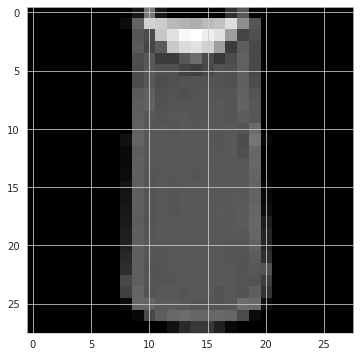

In [12]:
plt.imshow(x_train[2],cmap='gray')

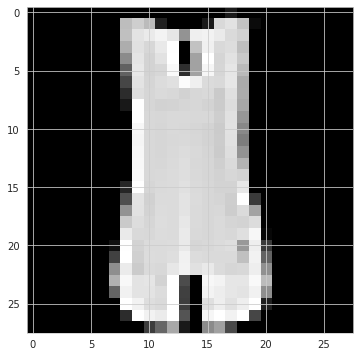

In [13]:
plt.imshow(x_train[4],cmap='gray')

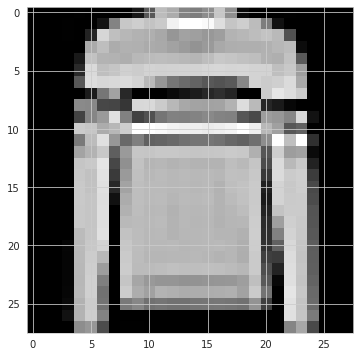

In [14]:
plt.imshow(x_train[5],cmap='gray')

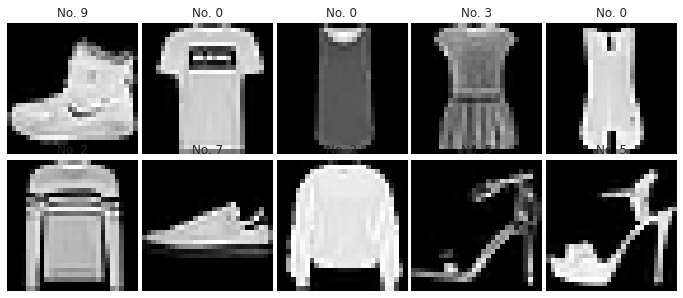

In [15]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.02}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].set_title('No. %d' % y_train[image_index])
        ax[r,c].imshow( x_train[image_index], cmap='gray')
       
        
plt.tight_layout()
plt.show()
plt.close()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [16]:
x_train[9].min()

0

In [17]:
x_train[9].max()

255

In [18]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [19]:
x_train[9].min()

0.0

In [20]:
x_train[9].max()

1.0

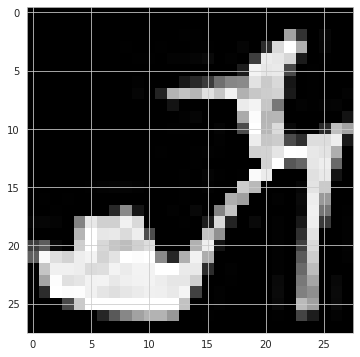

In [21]:
plt.imshow(x_train[9],cmap='gray')

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [22]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [23]:
x_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [24]:
x_train = x_train.reshape(x_train.shape[0],28, 28, 1) 
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [25]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [26]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [27]:
from tensorflow.keras.utils import to_categorical

In [28]:
y_train = to_categorical(y_train, 10) 
y_test = to_categorical(y_test, 10)

In [29]:
y_train.shape

(60000, 10)

In [30]:
y_test.shape

(10000, 10)

In [31]:
y_test[9]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [33]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu')) # stride = 1, padding = valid 

model.add(MaxPool2D(pool_size=(2, 2),strides=(1,1))) # stride = pool size, padding = valid

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 20000)             0         
                                                                 
 dense (Dense)               (None, 128)               2560128   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,561,738
Trainable params: 2,561,738
Non-trainable params: 0
______________________________________________

In [35]:
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
early_stop = EarlyStopping(monitor='val_accuracy',mode="max", patience=2, restore_best_weights = True)

In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test,y_test),callbacks=[early_stop]) 

Epoch 1/10
1875/1875 [==============================] - 114s 60ms/step - loss: 0.3740 - accuracy: 0.8680 - val_loss: 0.3160 - val_accuracy: 0.8867
Epoch 2/10
1875/1875 [==============================] - 104s 56ms/step - loss: 0.2530 - accuracy: 0.9095 - val_loss: 0.2731 - val_accuracy: 0.9043
Epoch 3/10
1875/1875 [==============================] - 106s 56ms/step - loss: 0.2142 - accuracy: 0.9240 - val_loss: 0.2885 - val_accuracy: 0.9066
Epoch 4/10
1875/1875 [==============================] - 104s 56ms/step - loss: 0.1908 - accuracy: 0.9335 - val_loss: 0.2815 - val_accuracy: 0.9100
Epoch 5/10
1875/1875 [==============================] - 106s 56ms/step - loss: 0.1720 - accuracy: 0.9391 - val_loss: 0.2930 - val_accuracy: 0.9035
Epoch 6/10
1875/1875 [==============================] - 106s 57ms/step - loss: 0.1599 - accuracy: 0.9445 - val_loss: 0.2921 - val_accuracy: 0.9114
Epoch 7/10
1875/1875 [==============================] - 104s 55ms/step - loss: 0.1476 - accuracy: 0.9483 - val_loss: 0

**TASK 7: Plot values of metrics you used in your model.**

In [38]:
model.metrics_names

['loss', 'accuracy']

In [39]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.374,0.868,0.316,0.887
1,0.253,0.910,0.273,0.904
2,0.214,0.924,0.288,0.907
3,0.191,0.933,0.282,0.910
4,0.172,0.939,0.293,0.904


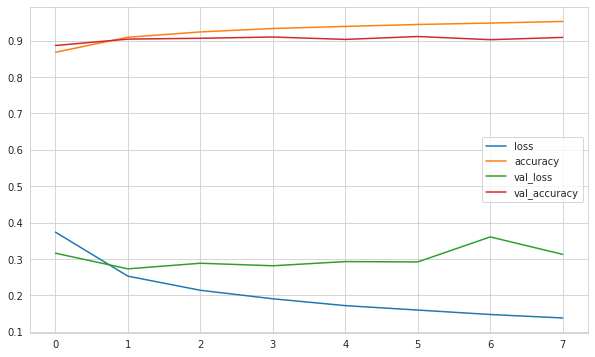

In [41]:
summary.plot()

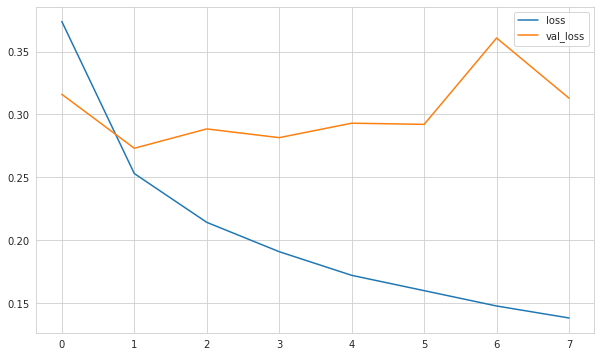

In [42]:
summary[["loss","val_loss"]].plot()

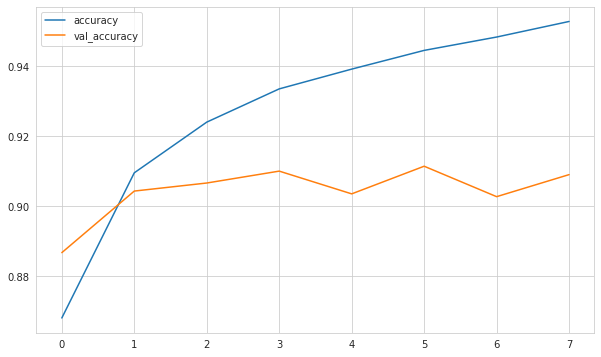

In [43]:
summary[["accuracy","val_accuracy"]].plot()

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [44]:
from sklearn.metrics import classification_report, confusion_matrix,multilabel_confusion_matrix

In [45]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 4s 14ms/step - loss: 0.2921 - accuracy: 0.9114


[0.2921105921268463, 0.9114000201225281]

In [46]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2921105921268463
Test accuracy: 0.9114000201225281


## Prediction

In [48]:
pred_prob = model.predict(x_test)
pred_prob

313/313 [==============================] - 4s 12ms/step


array([[1.0295967e-09, 8.6905996e-11, 1.3395531e-08, ..., 4.3134968e-04,
        1.9541826e-08, 9.9936014e-01],
       [8.6189411e-09, 1.5085942e-23, 9.9999994e-01, ..., 7.3613152e-15,
        7.3111892e-16, 2.8969046e-18],
       [1.1154286e-09, 9.9999994e-01, 3.7299715e-11, ..., 1.6249228e-11,
        2.3925675e-09, 1.2130851e-11],
       ...,
       [2.0099132e-11, 1.3068203e-23, 1.0733393e-10, ..., 2.5132156e-13,
        9.9999994e-01, 4.7327123e-19],
       [2.9071470e-09, 9.9999994e-01, 5.6162747e-10, ..., 6.6331376e-12,
        4.6505588e-11, 3.7223902e-10],
       [2.0673408e-04, 3.0599824e-06, 4.0466324e-03, ..., 3.6984276e-02,
        3.4347433e-03, 4.9584726e-04]], dtype=float32)

In [49]:
pred_prob.shape

(10000, 10)

In [52]:
pred_prob[0]

array([1.0295967e-09, 8.6905996e-11, 1.3395531e-08, 5.5100900e-13,
       4.4951107e-10, 2.0850134e-04, 1.0802421e-08, 4.3134968e-04,
       1.9541826e-08, 9.9936014e-01], dtype=float32)

In [53]:
np.argmax(pred_prob[0])

9

In [54]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [74]:
x_test[4].shape

(28, 28, 1)

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___